In [ ]:
%load_ext autoreload
%autoreload 2

# Preparation

## 1. Data download

We download [RCV1 dataset](https://paperswithcode.com/dataset/rcv1), in particular we use tf-idf representation from [sklearn](https://scikit-learn.org/0.18/datasets/rcv1.html).

Create downloader instance.

In [1]:
from model.dataset import RCV1Downloader

downloader = RCV1Downloader()
downloader

RCV1Downloader [File: /home/sebaq/Documents/GitHub/IR_project/dataset/data.npz; Downloaded: True]

Download the dataset.

In [2]:
%%time

downloader.download()

INFO: Dataset is already downloaded at /home/sebaq/Documents/GitHub/IR_project/dataset/data.npz
CPU times: user 0 ns, sys: 1.88 ms, total: 1.88 ms
Wall time: 1.79 ms


## 2. d-Gap

Load data.

In [3]:
from model.dataset import RCV1Loader

loader = RCV1Loader()
loader

RCV1Loader [File: /home/sebaq/Documents/GitHub/IR_project/dataset/data.npz]

We sort:
 - documents (rows) by decreasing number of distinct terms.
 - terms (columns) by decreasing frequency.

In [4]:
# data = loader.load(sort_docs=True, sort_terms=True)
data = loader.load(
    docs=50000, terms=20000,
    sort_docs=True, sort_terms=True
)

INFO: Loading matrix. 
I/O: Loading /home/sebaq/Documents/GitHub/IR_project/dataset/data.npz. 
INFO: Removing non informative terms. 
INFO: Sorting documents by terms count. 
INFO: Sorting terms by their frequency. 


In [5]:
data

DocumentsCollection[Docs: 50000; Terms: 19974; Nonzero: 1695138]

In [6]:
%%time

data.gaps;

INFO: Computing gaps per term


100%|██████████| 50000/50000 [00:03<00:00, 14904.06it/s]

CPU times: user 3.36 s, sys: 13.1 ms, total: 3.37 s
Wall time: 3.37 s


Plot the total *d*-gap per term.

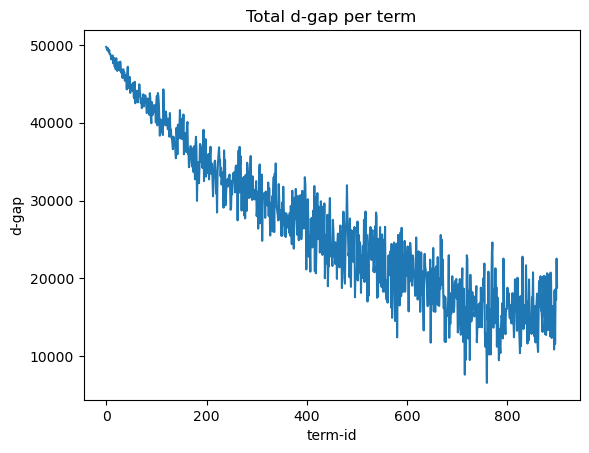

In [7]:
data.plot_tot_d_gap()

Plot the average *d*-gap per term.

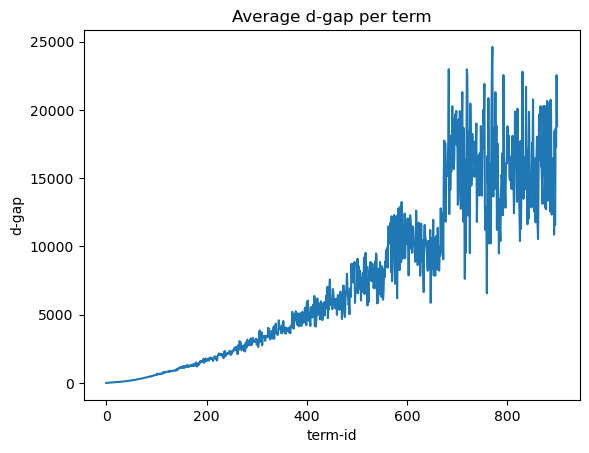

In [8]:
data.plot_avg_d_gap()

Plot the maximum *d*-gap per term.

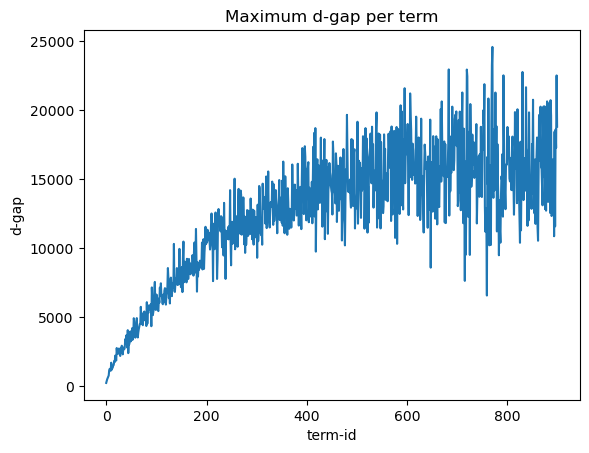

In [9]:
data.plot_max_d_gap()

Overall statistics:

In [10]:
print(f"Total d-gap: {data.tot_d_gap}")
print(f"Average d-gap: {data.avg_d_gap}")
print(f"Maximum d-gap: {data.max_d_gap}")

Total d-gap: 534147607
Average d-gap: 7387.130882841024
Maximum d-gap: 49969
